In [1]:
import sys
sys.path.append('../')

In [2]:
import pennylane as qml 
from pennylane import numpy as np 
import matplotlib.pyplot as plt 
from main import VarFourier
from main import RY_ansatz, Rot_ansatz, ZGR_ansatz

In [3]:
num_qubits = 4

In [4]:
def init_state():
    #qml.AmplitudeEmbedding(features=vecs[:,0], wires=range(num_qubits))
    pass 

In [24]:
num_layers = 5
var_state_class = ZGR_ansatz(num_qubits, num_layers)
#var_state_class = Rot_ansatz(num_qubits,num_layers)
var_state_class = RY_ansatz(num_qubits,num_layers)
var_state = var_state_class.construct_circuit
num_params = var_state_class.num_params


(<Figure size 2800x600 with 1 Axes>, <Axes: >)

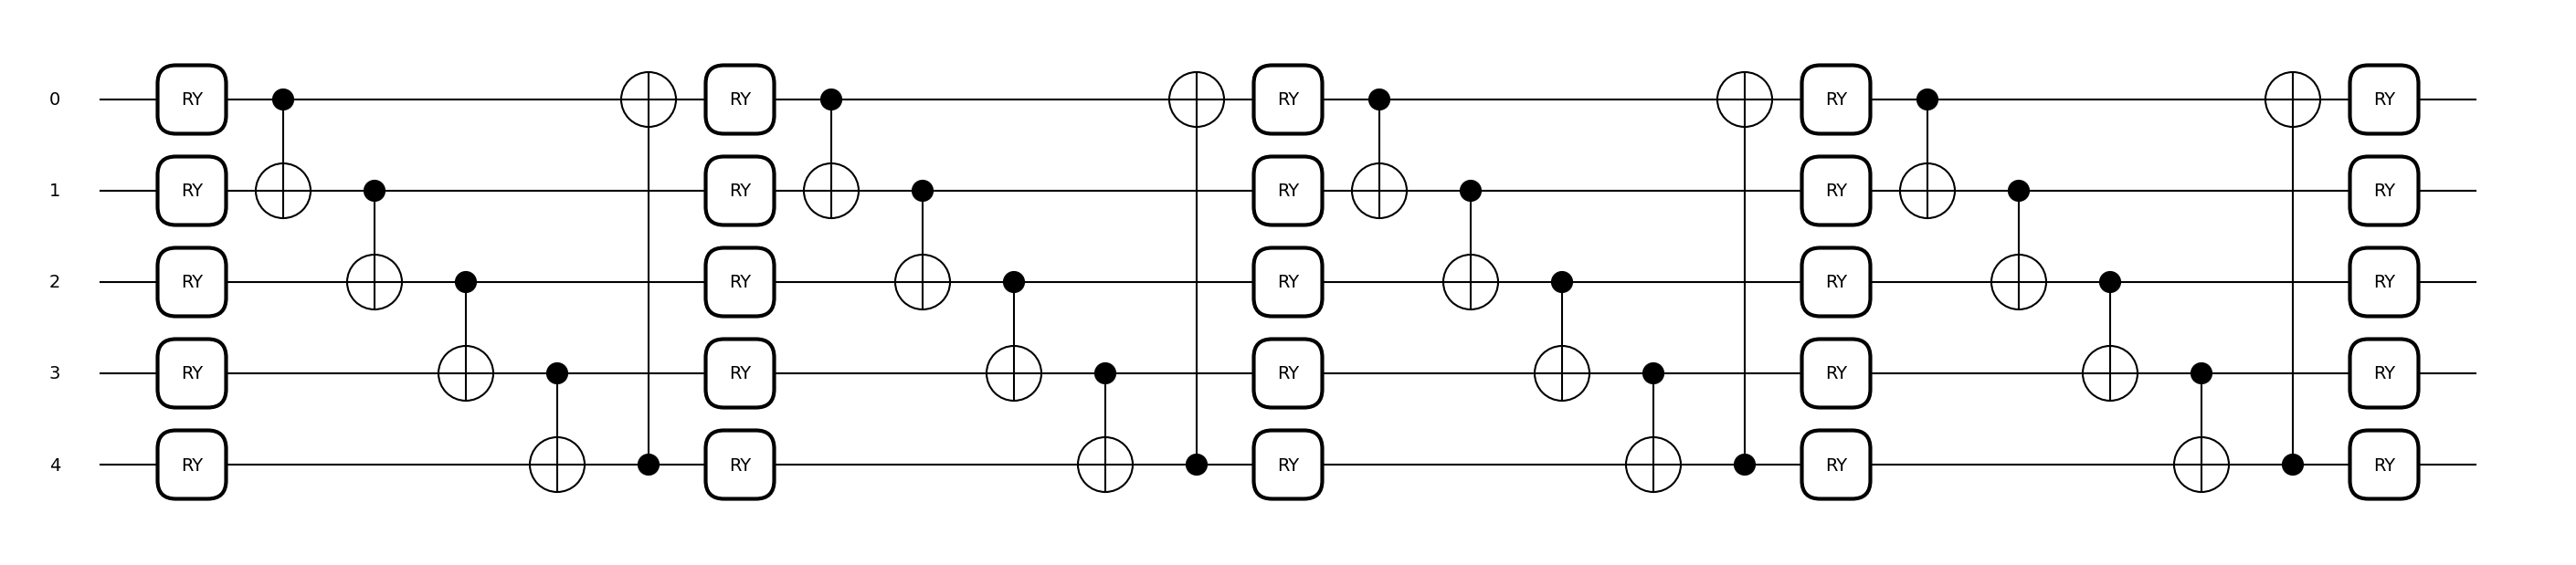

In [25]:
qml.draw_mpl( var_state )( num_params*[0] )

In [26]:
device = qml.device( "lightning.qubit", 
                    wires=num_qubits)

varqft = VarFourier( num_qubits,
                    lambda x : -1/x,
                    lambda p : p**2/2,
                    device,
                    var_state  = var_state,
                    init_state = init_state,
                    #semi_classical=True
                    )

In [27]:
vals, vecs = varqft.energy_eigens()
val = vals[0]
vec = vecs[:,0]
val2 = vals[1]
vec2 = vecs[:,1] 
vals

array([-1.56794747, -0.1764879 ,  0.22574241,  0.58712251,  0.93483088,
        1.4683216 ,  1.92411206,  2.74688372,  3.25628979,  4.40596576,
        4.94588106,  6.43962589,  6.99891614,  8.84592904,  9.41835423,
       11.62401497, 12.20588204, 14.77368024, 15.36252416, 18.29470916,
       18.88898737, 22.18741024, 22.7858808 , 26.45182622, 27.05373048,
       31.089323  , 31.69352861, 36.10106113, 36.70633106, 41.50077089,
       42.09922346, 47.56568923])

In [28]:
params_init = np.random.randn( num_params )*0.001
#params_pre = params_ground[-1]
#params_ground, energies_ground = varqft.run( np.concatenate((params_pre,np.random.randn(num_qubits)*1e-3)), max_iterations=500, learning_rate=0.5, conv_tol=1e-6 )
params_ground, energies_ground = varqft.run( params_init , max_iterations=500, learning_rate=0.2, conv_tol=1e-6 )

Step = 0,  Energy = 13.98023510
Step = 5,  Energy = 6.02951527
Step = 10,  Energy = 3.12017751
Step = 15,  Energy = 1.94151711
Step = 20,  Energy = 1.35178196
Step = 25,  Energy = 0.65023619
Step = 30,  Energy = 0.32857621
Step = 35,  Energy = 0.21310556
Step = 40,  Energy = 0.08335680
Step = 45,  Energy = -0.13491166
Step = 50,  Energy = -0.46634746
Step = 55,  Energy = -0.69199669
Step = 60,  Energy = -0.93062520
Step = 65,  Energy = -1.08141482
Step = 70,  Energy = -1.25327027
Step = 75,  Energy = -1.32127225
Step = 80,  Energy = -1.35611045
Step = 85,  Energy = -1.37845981
Step = 90,  Energy = -1.38660061
Step = 95,  Energy = -1.40268528
Step = 100,  Energy = -1.41727352
Step = 105,  Energy = -1.42999363
Step = 110,  Energy = -1.43889534
Step = 115,  Energy = -1.44905210
Step = 120,  Energy = -1.45939040
Step = 125,  Energy = -1.46743608
Step = 130,  Energy = -1.47286153
Step = 135,  Energy = -1.47621536
Step = 140,  Energy = -1.47862947
Step = 145,  Energy = -1.48139167
Step = 150

In [29]:
params_init

tensor([ 2.75869329e-03, -9.39814633e-04,  2.26555795e-04,
        -1.20868850e-03, -4.76331785e-04,  1.75717723e-03,
         7.37259839e-04,  1.00880582e-03, -1.94266444e-05,
         4.13622352e-04,  2.44356707e-04,  1.68955100e-04,
         9.64938372e-04,  7.68165482e-04, -1.50755701e-03,
        -2.97261704e-04, -7.67322244e-04,  2.30685389e-04,
         3.95415859e-04, -6.47176829e-04, -1.46277084e-03,
        -1.93336924e-03, -1.56973864e-04,  1.78159332e-04,
         3.34410933e-03], requires_grad=True)

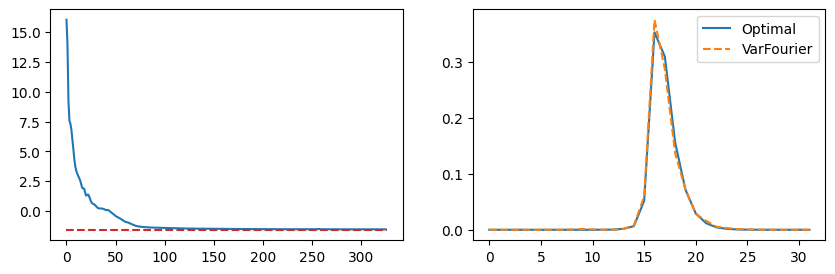

In [30]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_ground )
ax[0].hlines( val, 0, len(energies_ground), colors='tab:red', linestyles='--' ) 

ground_state = varqft.state( params_ground[-1] )

ax[1].plot( np.abs(vec)**2) 
ax[1].plot( np.abs(ground_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [31]:
abs(np.vdot( ground_state, vec ))**2

0.9934457028866559

In [32]:
params_ground[-1]

Array([-1.5920253e+00,  1.5639009e+00, -1.1686940e-02,  1.5642493e+00,
       -1.5774629e+00, -1.6288114e-03, -1.5398455e-01, -5.5635458e-01,
        3.4685507e-01, -5.5117882e-04, -8.2380347e-02,  7.0051444e-01,
       -7.5603813e-02, -1.5806050e+00, -2.1778184e-03, -6.6674298e-01,
        5.7657975e-01, -2.5013210e-02,  9.1291852e-02,  1.0370276e+00,
        1.5623523e+00,  3.2449262e+00, -1.0883557e+00,  1.0232012e+00,
       -5.3937334e-01], dtype=float32)

In [34]:
varqft = VarFourier( num_qubits, 
                    lambda x : -1/x,
                    lambda p : p**2/2, 
                    device, 
                    var_state  = var_state, 
                    init_state = init_state, 
                    orthovals  = 25, 
                    orthoparams= np.copy(params_ground[-1]) 
                    ) 

In [40]:
#params_init_ex = np.random.randn( num_params )*0.001

params_excited, energies_excited = varqft.run( params_excited[-1], max_iterations=300, learning_rate= 0.1, conv_tol=1e-6)

Step = 0,  Energy = 23.19681358
Step = 5,  Energy = 23.14355278
Step = 10,  Energy = 23.07021713
Step = 15,  Energy = 23.21887589
Step = 20,  Energy = 23.21662331


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fbd73ee1950>>
Traceback (most recent call last):
  File "/home/ctabares/.virtualenvs/qhack/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Step = 25,  Energy = 23.29565048
Step = 30,  Energy = 23.14776039
Step = 35,  Energy = 23.30650139
Step = 40,  Energy = 23.21319580
Step = 45,  Energy = 23.25442696
Step = 50,  Energy = 23.24980354
Step = 55,  Energy = 23.23305321
Step = 60,  Energy = 23.24862671
Step = 65,  Energy = 23.23400497


In [37]:
val

-1.56794747454093

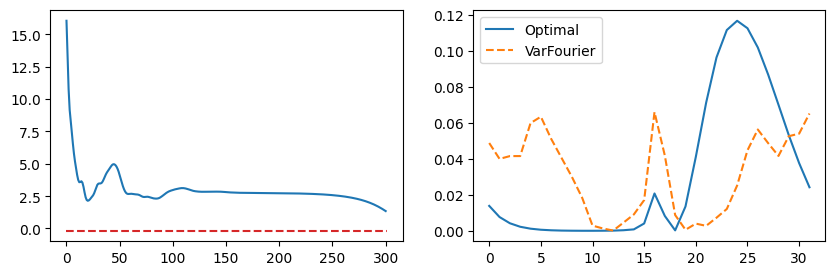

In [38]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_excited )
ax[0].hlines( val2, 0, len(energies_excited), colors='tab:red', linestyles='--' ) 

excited_state = varqft.state( params_excited[80] )

ax[1].plot( np.abs(vec2)**2) 
ax[1].plot( np.abs(excited_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [40]:
abs(np.vdot( ground_state, vec ))**2

0.9997133196180503

In [41]:
abs(np.vdot( ground_state, excited_state ))**2 

0.06873983727190591

In [42]:
abs(np.vdot( excited_state, vec2 ))**2

0.17217776825898531